# 군집화(Clustering)

- 데이터 포인트들을 **별개의 군집으로 그룹화**하는 것
- **유사성이 높은 데이터들을 동일한 그룹으로 분류**, 서로 다른 군집들이 상이성을 가지도록 그룹화

* 군집화 활용 분야
  - 고객, 마켓, 브랜드, 사회 경제 활동 세분화(Segmentation)
  - 이미지 검출, 세분화, 트랙킹
  - 이상검출(Anomaly Detection)

* 군집화 알고리즘
  - K-Means
  - Mean shift
  - Gaussian Mixture Model
  - DBSCAN

## K-Means
- **군집 중심점(Centroid)** 기반 클러스터링

### K-Means 절차
1. 군집 중심점의 개수 n을 지정
2. 원본 데이터에 랜덤하게 군집 중심점 n개를 설정한다.
3. 각 데이터들은 가장 가까운 중심점에 소속된다.
4. 중심점에 할당된 데이터들의 평균 중심으로 중심점이 이동한다.
5. 이동한 중심점을 기준으로, 각 데이터들은 가장 가까운 중심점에 소속된다.
6. 다시 중심점에 할당된 데이터들의 평균 중심으로 중심점이 이동한다.
7. 만약 중심점을 이동하였으나 데이터들의 중심점 소속 변경이 없다면 군집화가 완료된다.

### K-Means의 장점
- 일반적인 군집화에서 가장 많이 사용되는 알고리즘
- 거리 기반 알고리즘을 사용하기 때문에 알아보기 쉽고 간결하다.
- 대용량 데이터에도 활용이 가능하다.

### K-Means의 단점
- 거리 기반 알고리즘으로 데이터의 속성(피처)의 개수가 매우 많을 경우 군집화 정확도가 떨어지게 된다.
  - 이를 방지하기 위해 PCA로 피처 데이터에 차원 축소를 적용해야 할 수도 있다.
- 데이터를 중심점에 소속하고 중심점이 이동하는 것이 반복되는데, 반복 횟수가 많은 경우 수행시간이 느려진다.
- 이상치 데이터에 매우 취약하다.
  - 이상치 데이터의 영향으로 군집 중심점이 엄청나게 큰 폭으로 이동될 수 있다.

### 사이킷런의 `KMeans` 클래스
사이킷런의 서브패키지 `cluster` 에서 `KMeans` 클래스를 제공

```python
from sklearn.cluster import KMeans

KMeans(
  n_clusters=8,
  init='k-means++',
  n_init=10,
  max_iter=300,
  tol=0.0001,
  precompute_distances='auto',
  verbose=0,
  random_state=None,
  copy_x=True,
  n_jobs=1,
  algorithm='auto'
)
```

- `n_clusters` : 군집의 개수. 군집 중심점의 개수 지정
  - 가장 중요한 파라미터
- `max_iter` : 중심점 이동의 최대 반복 횟수. 지정한 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
- `labels_` : 각 데이터 포인트가 속한 군집 중심점 레이블
- `cluster_centers_` 각 군집 중심점의 좌표
  - Shape는 `[군집개수, 피처개수]`
  - 이를 이용해 군집 중심점 좌표가 어디인지 시각화 가능
- `n_clusters`, `max_iter` 파라미터를 주로 지정하고 나머지는 기본 옵션을 주로 사용한다.

## K-Means 실습
- 사이킷런의 붗꽃 데이터셋 이용

In [10]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 피처 데이터의 이름 확인
print('feature name:', feature_names)

# 타겟(결정 값)의 클래스명 확인
print('target name:', target_names)

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

feature name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
from sklearn.cluster import KMeans

## 클러스터(군집화) 개수 지정
# 위에서 붗꽃 데이터 셋의 클래스가 3개인 것을 알고 있기 때문에 n_clusters=3으로 미리 지정
# 클래스 개수를 미리 파악하여 클러스터의 개수를 지정하는 것이 좋다.
n_clusters = 3

## KMeans 클래스 객체 생성
kmeans = KMeans(n_clusters=n_clusters, max_iter=300, random_state=0)

## 훈련 - 데이터 입력
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

### `KMeans`의 속성(Property) 확인
- 훈련이 끝난 `KMeans`의 군집 객체(`kmeans`)에서 클러스터를 확인할 수 있다.
- `labels_` : 훈련된(`fit`) 데이터에 대한 군집 레이블 확인
  - 지도학습에서 사용하는 label과 다른 개념이다.
  - 랜덤하게 `label`이 부여되기 때문에 사람이 해석해야 한다.

In [15]:
## kmeans의 속성 확인
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [19]:
## 예측 - 원본 데이터인 붗꽃 데이터 포인터들이 어떤 클러스터 레이블에 속하는지 예측한다.
kmeans.predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [17]:
# fit_predict() 는 fit(), predict()를 동시에 수행해주기 때문에, 위와 같은 결과로 예측된다
kmeans.fit_predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
## 군집상의 좌표값 확인
kmeans.transform(irisDF)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

- 동일한 클러스터는 비슷한 좌표값을 가지고, 다른 클러스터는 아주 다른 좌표값을 가지는 것을 확인할 수 있다.

In [27]:
## 실제 타겟과 군집의 차이를 비교
target, kmeans.labels_

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2

In [28]:
## 시각화
# 실제 타겟과 군집의 레이블 비교
irisDF['target'] = target
irisDF['cluster'] = kmeans.labels_
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,c1,c2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,-2.684126
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-2.714142
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-2.888991
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-2.745343
4,5.0,3.6,1.4,0.2,0,1,-2.728717,-2.728717


In [29]:
# 타겟과 클러스터의 개수를 각각 확인 - groupby(), count() 사용
irisDF.groupby(["target", "cluster"]).count()

sepal_length  sepal_width  petal_length  petal_width  c1  c2
target cluster                                                              
0      1                  50           50            50           50  50  50
1      0                  48           48            48           48  48  48
       2                   2            2             2            2   2   2
2      0                  14           14            14           14  14  14
       2                  36           36            36           36  36  36

- 타겟에 대해 0번 클래스는 모두 1번 클러스터로 되어 있기 때문에, 군집이 아주 잘 되었다고 볼 수 있다.
- 1번 클래스, 2번 클래스는 0번과 2번 두 가지 클러스터가 섞여있기 때문에, 군집을 하는데 어려움이 있다고 볼 수 있다.
  - 1번 클래스는 0번 클러스터 48개, 2번 클러스터 2개
  - 2번 클래스는 0번 클러스터 14개, 2번 클러스터 36개

- 위 결과는 시각화를 통해 좀 더 결과를 쉽게 확인할 수 있다.

### PCA를 통해 데이터 차원 축소 후 시각화 확인

In [33]:
## PCA를 통해 데이터 차원축소 후 시각화
from sklearn.decomposition import PCA

# 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

# 2차원으로 차원 축소한 데이터를 DataFrame에 추가
irisDF["c1"] = pca_transformed[:, 0] # 전체 행, 첫 번째 열
irisDF["c2"] = pca_transformed[:, 1] # 전체 행, 두 번째 열

# 2차원에서 시각화한 데이터프레임 확인하기
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,c1,c2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


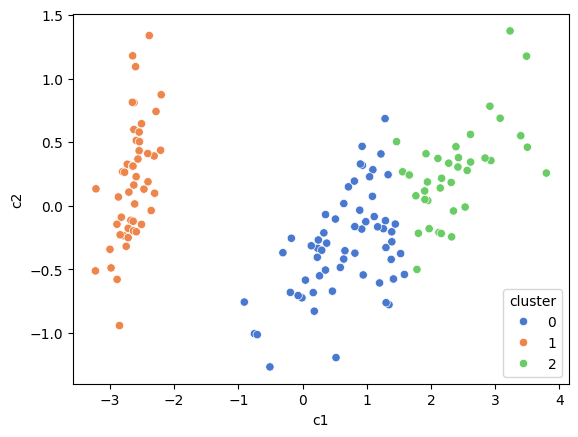

In [34]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 각 컴포넌트 별 군집을 시각화하여 확인
sns.scatterplot(
    x = "c1",
    y = "c2",
    hue = "cluster",
    palette = 'muted',
    data=irisDF
)

plt.show()

- 자신만의 클러스터 영역을 가지고 있는 것을 확인할 수 있다.

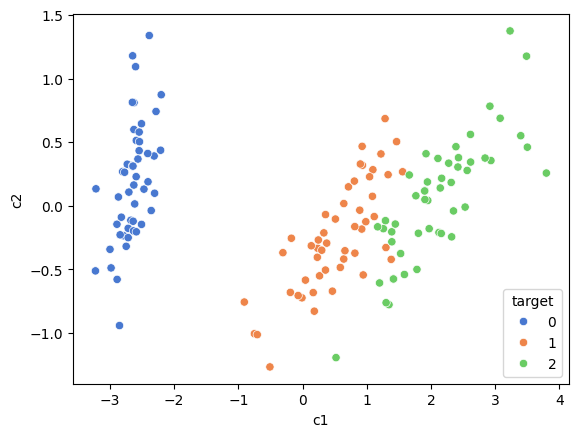

In [35]:
import seaborn as sns

# 각 컴포넌트 별 타겟 확인
sns.scatterplot(
    x = "c1",
    y = "c2",
    hue="target",
    palette='muted',
    data=irisDF
)
plt.show()

- 군집을 시각화한 것과 비교했을 때 타겟이 좀 더 섞여 있는 것을 확인할 수 있다.

## K-Means 실습
- `make_blobs`를 이용하여 임의의 데이터 세트의 군집 확인

In [38]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


* `n_samples` : 생성할 총 데이터의 개수. Default는 100


* `n_features`: 데이터의 피처 개수.
  - 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처는 y 좌표상에 표현


* `centers`
  - int 형태로 표현할 경우 군집의 개수를 의미
  - ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미


* `cluster_std`
  - float 형태로 표현할 경우 생성될 군집 데이터의 표준 편차
    - `cluster_std=0.8` : 군집 내에서 데이 터가 표준편차 0.8을 가진 값으로 생성
  - flaot 값을 요소로 가진 ndarray 형태로 표현할 경우 군집별 표준 편차를 의미
    - ex. `cluster_std=[0.8, 1,2, 0.6]` : 3개의 군집에서 첫 번째 군집 내
  데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 생성
    - 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용

In [39]:
# 판다스 데이터프레임으로 정리
import pandas as pd

clusterDF = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

clusterDF['target'] = y
clusterDF.head()

,x1,x2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


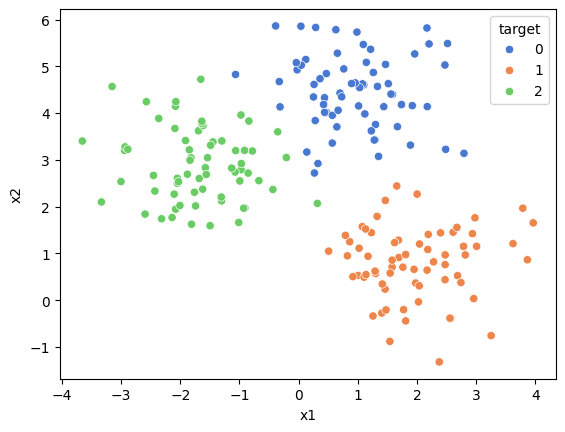

In [40]:
# 실제 타겟 데이터에 대한 시각화
sns.scatterplot(
    x = "x1",
    y = "x2",
    hue = "target",
    palette = 'muted',
    data=clusterDF
)

plt.show()

In [41]:
## Kmeans 이용해 클러스터 확인
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int32)

In [42]:
# 클러스터 레이블을 데이터프레임에 추가
clusterDF['cluster'] = cluster_labels

clusterDF.head()

,x1,x2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


In [43]:
## 군집 중심점(centroid) 좌표 확인
# 군집 중심점은 군집의 대표적인 특성을 나타내는 메인 좌표로로 볼 수 있다.
# 데이터가 centroid에 가까울 수록 군집의 핵심적인 특성을 가진다고 볼 수 있고, 멀어질 수록 해당 특성에서 점점 멀어진다고 볼 수 있다.
centers = kmeans.cluster_centers_
centers

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

- 좌측은 `x1`에 대한, 우측은 `x2`에 대한 군집 중심점 좌표이다.

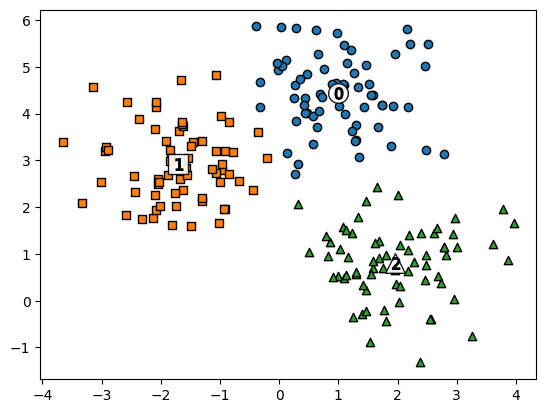

In [44]:
# 군집 중심점 시각화
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['cluster']==label]
    plt.scatter(x=label_cluster['x1'], y=label_cluster['x2'], edgecolor='k',
                marker=markers[label] )

    center_x_y = centers[label]

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()